# Using AWS Autogluon to predict rent prices in Canada based on city, province, latitude, longitude, lease_term, type, price, beds, baths, sq_feet, furnishing, availability_date, smoking, and whether cats and dogs are allowed







In [1]:
# !pip install autogluon

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("rentfaster.csv")

In [5]:
df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [6]:
df.columns

Index(['rentfaster_id', 'city', 'province', 'address', 'latitude', 'longitude',
       'lease_term', 'type', 'price', 'beds', 'baths', 'sq_feet', 'link',
       'furnishing', 'availability_date', 'smoking', 'cats', 'dogs'],
      dtype='object')

In [7]:
# Remove unnecessary columns
df = df.drop(axis=1, columns = ["address", "link", "rentfaster_id"])

In [8]:
df.head()

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
0,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,Unfurnished,Immediate,Non-Smoking,True,True
1,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,Unfurnished,Immediate,Non-Smoking,True,True
2,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,Unfurnished,Immediate,Non-Smoking,True,True
3,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,Unfurnished,November 18,Non-Smoking,True,True
4,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,Unfurnished,Immediate,Non-Smoking,True,True


In [9]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [10]:
# Regressing for the price
target = "price"

In [11]:
train_data = TabularDataset(df)

In [12]:
# Sample 70% randomly for the train data
subsample_size = int(0.7*len(df))

In [13]:
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head()

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
12512,Calgary,Alberta,51.032613,-114.062190,Long Term,Condo Unit,2150.0,1 Bed,1,763,Unfurnished,July 01,Non-Smoking,False,False
24216,Montréal,Quebec,45.505681,-73.563915,Long Term,Apartment,3390.0,2 Beds,1,1058,Unfurnished,Immediate,Non-Smoking,True,True
13161,Calgary,Alberta,50.859881,-114.078010,Long Term,Basement,1300.0,1 Bed,1,700,Unfurnished,July 01,Non-Smoking,True,True
2415,Calgary,Alberta,51.134793,-113.949708,Long Term,Condo Unit,2150.0,2 Beds,2,980,Unfurnished,Immediate,Non-Smoking,False,False
7519,Edmonton,Alberta,53.544671,-113.577309,12 months,House,1700.0,2 Beds,2,800,Unfurnished,July 01,Non-Smoking,True,True


In [13]:
# Training a fast model
predictor_price = TabularPredictor(label=target).fit(train_data, time_limit=60)

No path specified. Models will be saved in: "AutogluonModels/ag-20241117_161814"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.88 GB / 12.67 GB (85.9%)
Disk Space Avail:   65.91 GB / 107.72 GB (61.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 423.81
[2000]	valid_set's rmse: 415.834
[3000]	valid_set's rmse: 410.2
[4000]	valid_set's rmse: 407.48
[5000]	valid_set's rmse: 404.523
[6000]	valid_set's rmse: 402.728
[7000]	valid_set's rmse: 400.988
[8000]	valid_set's rmse: 399.787
[9000]	valid_set's rmse: 399.434
[10000]	valid_set's rmse: 398.293


	-398.293	 = Validation score   (-root_mean_squared_error)
	30.04s	 = Training   runtime
	10.43s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 14.44s of the 14.44s of remaining time.


[1000]	valid_set's rmse: 378.305
[2000]	valid_set's rmse: 365.213
[3000]	valid_set's rmse: 360.246
[4000]	valid_set's rmse: 357.389
[5000]	valid_set's rmse: 355.923


	Ran out of time, early stopping on iteration 5875. Best iteration is:
	[5863]	valid_set's rmse: 354.889
	-354.8894	 = Validation score   (-root_mean_squared_error)
	15.51s	 = Training   runtime
	1.97s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 59.37s of the -4.59s of remaining time.
	Ensemble Weights: {'LightGBM': 0.737, 'KNeighborsDist': 0.158, 'LightGBMXT': 0.105}
	-341.2729	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 64.66s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 145.3 rows/s (1804 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20241117_161814")


In [14]:
# Creating test data for the rows that have not been sampled by the train data
test_data = TabularDataset(df.drop(train_data.index))
y_test = test_data[target]

In [15]:
# predictor = TabularPredictor.load("agModels-predictprice")

# Predicting rent prices for the test data
y_pred = predictor_price.predict(test_data)
print("Predictions:  \n", y_pred)
perf = predictor_price.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Predictions:  
 10       2736.225098
11       2212.453857
13       2559.374023
19       2113.462646
24       2080.962402
            ...     
25748    1267.991943
25755    1058.244019
25762     945.008179
25763    1113.939209
25764     945.008179
Name: price, Length: 7732, dtype: float32


In [16]:
# Looking at the performance
perf

{'root_mean_squared_error': -394.74039693281304,
 'mean_squared_error': -155819.9809706748,
 'mean_absolute_error': -183.9261484073692,
 'r2': 0.8358683478621021,
 'pearsonr': 0.9144924898179707,
 'median_absolute_error': -98.54681396484375}

In [18]:
# retraining the model using best_quality and time limit of 10 minutes, focusing on MAE
predictor_price = TabularPredictor(label=target, path="agModels-predictprice",
                                   eval_metric="root_mean_squared_error").fit(train_data,
                                   presets="best_quality", time_limit=600)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.71 GB / 12.67 GB (84.5%)
Disk Space Avail:   65.87 GB / 107.72 GB (61.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stack

(_ray_fit pid=4861) [1000]	valid_set's rmse: 475.131
(_ray_fit pid=4861) [3000]	valid_set's rmse: 452.806 [repeated 4x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)


(_ray_fit pid=5050) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=5050) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=5050)  [repeated 4x across cluster]
(_ray_fit pid=5050) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=5050) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=5050)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=5050) [1000]	valid_set's rmse: 454.321 [repeated 2x across cluster]
(_ray_fit pid=5050) [3000]	valid_set's rmse: 451.699 [repeated 4x across cluster]


(_ray_fit pid=5216) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=5216) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=5216)  [repeated 4x across cluster]
(_ray_fit pid=5216) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=5216) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=5216)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=5216) [1000]	valid_set's rmse: 442.112 [repeated 2x across cluster]
(_ray_fit pid=5216) [2000]	valid_set's rmse: 412.533 [repeated 2x across cluster]
(_ray_fit pid=5216) [4000]	valid_set's rmse: 387.657 [repeated 4x across cluster]


(_ray_fit pid=5404) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=5404) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=5404)  [repeated 4x across cluster]
(_ray_fit pid=5404) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=5404) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=5404)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=5433) [1000]	valid_set's rmse: 551.309 [repeated 2x across cluster]
(_ray_fit pid=5433) [3000]	valid_set's rmse: 488.475 [repeated 2x across cluster]
(_ray_fit pid=5433) [6000]	valid_set's rmse: 459.421 [repeated 3x across cluster]


(_dystack pid=4697) 	-484.9849	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4697) 	117.28s	 = Training   runtime
(_dystack pid=4697) 	25.87s	 = Validation runtime
(_dystack pid=4697) Fitting model: WeightedEnsemble_L2 ... Training model for up to 141.14s of the 12.97s of remaining time.
(_ray_fit pid=5433) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=5433) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=5433)  [repeated 2x across cluster]
(_ray_fit pid=5433) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=5433) This will raise in a future version.
(_ray_fit pid=5433)   warnings.warn(msg, FutureWarning)
(_dystack pid=4697) 	Ensemble Weights: {'LightGBMXT_BAG_L1': 0.769, 'KNeighborsDist_BAG_L1': 0.231}
(_dystack pid=4697) 	-460.7118	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4697) 	0.02s	 = Training   runtim

In [19]:
test_data = TabularDataset(df.drop(train_data.index))
y_test = test_data[target]
# predictor = TabularPredictor.load("agModels-predictprice")

y_pred = predictor_price.predict(test_data)
print("Predictions:  \n", y_pred)
perf = predictor_price.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Predictions:  
 10       2818.560791
11       2026.548340
13       2583.564453
19       2126.927246
24       1997.721191
            ...     
25748    1244.216064
25755    1066.665649
25762     896.792847
25763    1111.311279
25764     896.792847
Name: price, Length: 7732, dtype: float32


In [20]:
# Take a look at the performance of the model
perf

{'root_mean_squared_error': -431.76314186113444,
 'mean_squared_error': -186419.41066979812,
 'mean_absolute_error': -196.76120907033103,
 'r2': 0.8036366987519679,
 'pearsonr': 0.8978123558305657,
 'median_absolute_error': -116.48834228515625}

In [21]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
10,1930.0,2818.560791
11,1700.0,2026.548340
13,3150.0,2583.564453
19,2300.0,2126.927246
24,1910.0,1997.721191
...,...,...
25748,1305.0,1244.216064
25755,1085.0,1066.665649
25762,945.0,896.792847
25763,1025.0,1111.311279


In [22]:
# from google.colab import files
# files.download('/content/agModels-predictprice/models/WeightedEnsemble_L3')

In [ ]:
# # Reduce model size
# predictor_price.reduce_memory_size(remove_data=True, save_space=True)

# predictor_price.leaderboard(extra_info=True)
# predictor_price.delete_models(models_to_keep=predictor_price.leaderboard()['model'][:3])
# predictor_price.save("saved_model")


# Explainable AI

In [15]:
predictor_price = TabularPredictor.load("agModels-predictprice")

In [16]:
predictor_price.info()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


{'path': 'agModels-predictprice',
 'label': 'price',
 'random_state': 0,
 'version': '1.1.1',
 'features': ['city',
  'province',
  'latitude',
  'longitude',
  'lease_term',
  'type',
  'beds',
  'baths',
  'sq_feet',
  'furnishing',
  'availability_date',
  'smoking',
  'cats',
  'dogs'],
 'feature_metadata_in': <autogluon.common.features.feature_metadata.FeatureMetadata at 0x7aeddd0fa8f0>,
 'time_fit_preprocessing': 0.6379239559173584,
 'time_fit_training': 401.7536509037018,
 'time_fit_total': 402.39157485961914,
 'time_limit': 384.20341539382935,
 'time_train_start': 1731860728.1672926,
 'num_rows_train': 18039,
 'num_cols_train': 14,
 'num_rows_val': None,
 'num_classes': None,
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'best_model': 'WeightedEnsemble_L3',
 'best_model_score_val': -414.8760953952414,
 'best_model_stack_level': 3,
 'num_models_trained': 7,
 'num_bag_folds': 8,
 'max_stack_level': 3,
 'max_core_stack_level': 2,
 'model_info': {'KNeig

In [17]:
training_summary = predictor_price.fit_summary()
training_summary

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3 -414.876095  root_mean_squared_error     132.505690  375.993751                0.001236           0.048243            3       True          7
1    WeightedEnsemble_L2 -423.163408  root_mean_squared_error     118.358258  282.499167                0.000892           0.023722            2       True          4
2      LightGBMXT_BAG_L2 -432.884149  root_mean_squared_error     131.426344  345.975757               12.976854          63.470796            2       True          5
3        LightGBM_BAG_L2 -438.084324  root_mean_squared_error     119.527600  312.474711                1.078110          29.969751            2       True          6
4      LightGBMXT_BAG_L1 -442.089932  root_mean_squared_error     118.265830  282.429904              1

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -774.186517755969,
  'KNeighborsDist_BAG_L1': -652.2714801027624,
  'LightGBMXT_BAG_L1': -442.0899321234507,
  'WeightedEnsemble_L2': -423.163408198703,
  'LightGBMXT_BAG_L2': -432.88414922328326,
  'LightGBM_BAG_L2': -438.08432384123813,
  'WeightedEnsemble_L3': -414.8760953952414},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'LightGBMXT_BAG_L2': ['LightGBM

In [18]:
# Calculate feature importance
feature_importance = predictor_price.feature_importance(data=test_data, time_limit=600)
print(feature_importance)

                   importance  stddev  p_value  n  p99_high  p99_low
latitude           197.625936     NaN      NaN  1       NaN      NaN
longitude          180.109537     NaN      NaN  1       NaN      NaN
baths              167.315788     NaN      NaN  1       NaN      NaN
beds               156.030511     NaN      NaN  1       NaN      NaN
type               152.126349     NaN      NaN  1       NaN      NaN
furnishing          76.471019     NaN      NaN  1       NaN      NaN
lease_term          45.004177     NaN      NaN  1       NaN      NaN
city                44.273299     NaN      NaN  1       NaN      NaN
availability_date   37.439987     NaN      NaN  1       NaN      NaN
sq_feet             26.604972     NaN      NaN  1       NaN      NaN
province            23.759757     NaN      NaN  1       NaN      NaN
dogs                22.048391     NaN      NaN  1       NaN      NaN
cats                14.550022     NaN      NaN  1       NaN      NaN
smoking              8.246433     

- Positive scores indicate features that help the model predict accurately.
- Features with near-zero or negative scores may be redundant or harmful to the model's performance.

<Figure size 1000x600 with 0 Axes>

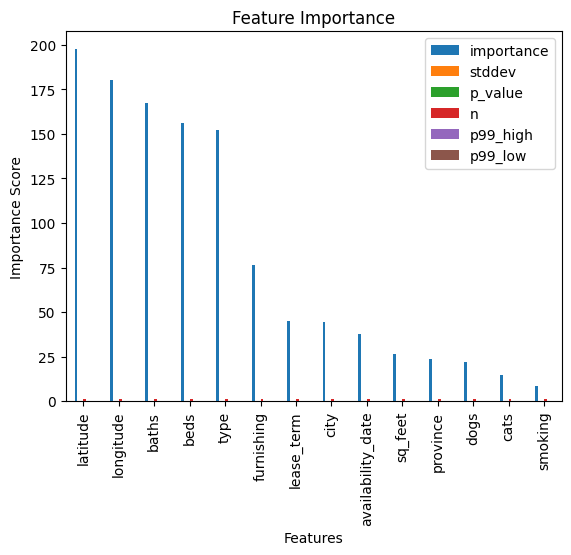

In [20]:
import matplotlib.pyplot as plt

# Sort importance values
sorted_importance = feature_importance.sort_values(by="importance",ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sorted_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

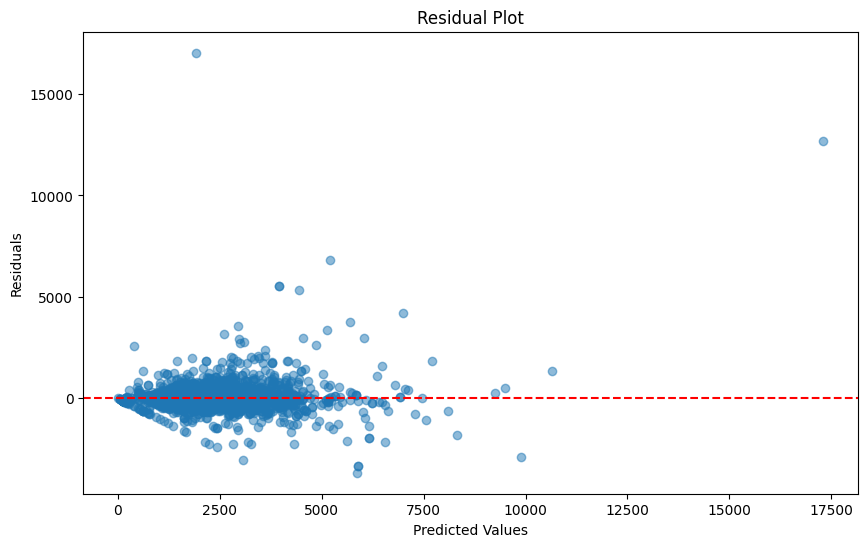

In [23]:
# Residual Plot
y_pred = predictor_price.predict(test_data.drop(columns=[target]))
y_true = test_data[target]

# Residuals
residuals = y_true - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# from autogluon.interpret import TabularExplainer

# explainer = TabularExplainer(predictor_price, test_data)
# shap_values = explainer.shap_values()
# explainer.plot_shap_summary(shap_values)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


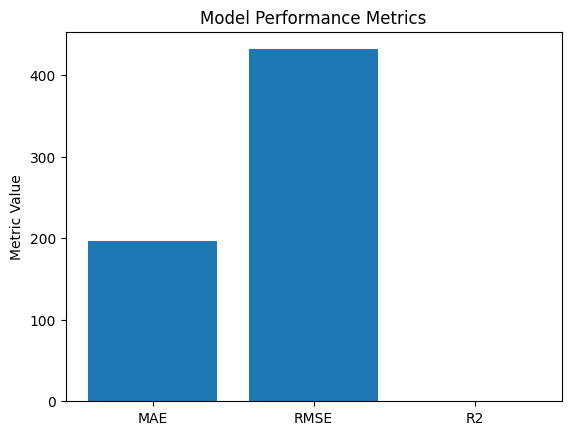

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

metrics = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
plt.bar(metrics.keys(), metrics.values())
plt.title('Model Performance Metrics')
plt.ylabel('Metric Value')
plt.show()

In [2]:
# !pip install shap